In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 23s 1us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/dinesh/miniconda3/envs/mypy3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/dinesh/miniconda3/envs/mypy3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

In [66]:
type(train_labels)

numpy.ndarray

In [3]:
print("Train data Shape is ",train_data.shape)
print("Train labels Shape is ",train_labels.shape)

Train data Shape is  (25000,)
Train labels Shape is  (25000,)


In [7]:
train_data[1:3]

array([list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]),
       list([1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4

In [8]:
train_labels[1:3]

array([0, 0])

In [9]:
import tensorflow as tf

In [11]:
max([max(sequence) for sequence in train_data])

9999

Lets Decode the text back to reviews.

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data

You can’t directly feed lists of integers into a neural network. They have all different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. There are two ways to do that:

* Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, 1), and then use it as the first layer in your model a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).
* One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use as the first layer in your model a Dense layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.

In [62]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    for i, sequence in enumerate(sequences):
#        print(sequence)
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [142]:
import pprint
pp = pprint.PrettyPrinter(width=120, compact=True)
pp.pprint(train_data[0])
pp.pprint(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670,
 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50,
 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515,
 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38,
 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117,
 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15,
 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28,
 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
array([0., 1., 1., ..., 0., 0., 0.])


In [139]:
## TODO: Try de-vectorise the data
def de_vectorize_one_hot(one_hot_encoded, dimension=10000):
    res = []
    for i in range(len(one_hot_encoded)):
        print(np.where(one_hot_encoded[i]==1))
    return res

In [141]:
#de_vectorize_one_hot(x_train)

You should also vectorize your labels, which is straightforward:



In [143]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [144]:
model = tf.keras.Sequential()

In [145]:
model.add(tf.keras.layers.Dense(16, activation='relu'))

In [146]:
model.add(tf.keras.layers.Dense(16, activation='relu'))

In [147]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [154]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [155]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [156]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5579 - accuracy: 0.7427 - val_loss: 0.4223 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3350 - accuracy: 0.8971 - val_loss: 0.3164 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2359 - accuracy: 0.9262 - val_loss: 0.2837 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1825 - accuracy: 0.9431 - val_loss: 0.2844 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1501 - accuracy: 0.9519 - val_loss: 0.2900 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1220 - accuracy: 0.9639 - val_loss: 0.2969 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1017 - accuracy: 0.9685 - val_loss: 0.3086 - val_accuracy: 0.8842
Epoch 8/20
30

In [158]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

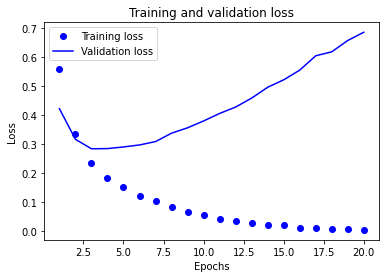

In [159]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

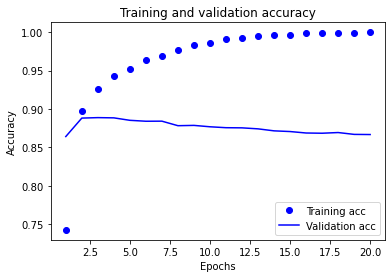

In [161]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization — the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In [186]:
n_model = tf.keras.Sequential([
#    tf.keras.layers.Dense(64, activation='tanh'),
 #   tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
n_model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
history1 = n_model.fit(x_train, y_train, epochs=5, batch_size=500)
print("Now lets evaluvate:")
results = n_model.evaluate(x_test, y_test)

Epoch 1/5
50/50 [==============================] - 0s 9ms/step - loss: 0.1418 - accuracy: 0.8308
Epoch 2/5
50/50 [==============================] - 0s 9ms/step - loss: 0.0785 - accuracy: 0.9121
Epoch 3/5
50/50 [==============================] - 0s 9ms/step - loss: 0.0606 - accuracy: 0.9302
Epoch 4/5
50/50 [==============================] - 0s 9ms/step - loss: 0.0497 - accuracy: 0.9431
Epoch 5/5
50/50 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9515
Now lets evaluvate:
782/782 [==============================] - 1s 787us/step - loss: 0.0912 - accuracy: 0.8772


In [173]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [183]:
results

[0.37362027168273926, 0.8632400035858154]

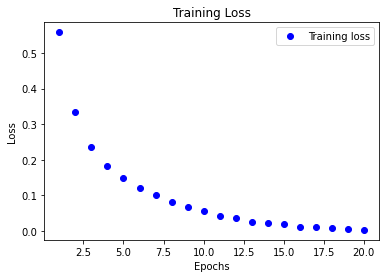

In [174]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

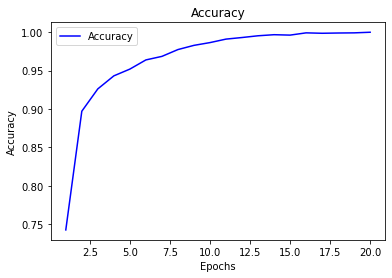

In [175]:
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [171]:
model.predict(x_test)

array([[0.2278693 ],
       [0.9999473 ],
       [0.8898695 ],
       ...,
       [0.12910381],
       [0.06790754],
       [0.6864263 ]], dtype=float32)

In [ ]:
model